----
<h1><font color="#f37626">[Experiment]</font> tensorflow-autolog 예제 코드</h1>

- 보다 상세한 Accuinsight 파이썬 패키지 사용법은 [Accuinsight 안내 홈페이지](https://accuinsight.cloudz.co.kr/#/intro) 또는 [Accuinsight Youtube 채널](https://www.youtube.com/channel/UChFs-FAVxgG4C00h8C1MqoA)을 참조하시기 바랍니다.
- Accuinsight 패키지를 사용한 분석 코드는 [Accuinsight-github](https://github.com/AccuInsight/accuinsight_Lifecycle_example)에서 조회 가능합니다.

### # fashion Mnist
> reference: https://www.tensorflow.org/tutorials/keras/classification
----

### 1. Import modules

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### 2. Fashion-MNIST 데이터셋 가져오기
__Fashion-Mnist dataset__
- 70,000개의 흑백 이미지로 구성
- 10개의 카테고리로 분류해야 함
(T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot)
   

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, valid_images, train_labels, valid_labels = train_test_split(train_images, train_labels, test_size = 10000, random_state=42)

In [3]:
print('Shape of train images: ', train_images.shape)
print('Shape of train labels: ', train_labels.shape)
print('-'*40)
print('Shape of valid images: ', valid_images.shape)
print('Shape of valid labels: ', valid_labels.shape)
print('-'*40)
print('Shape of test images: ', test_images.shape)
print('Shape of test labels: ', test_labels.shape)
print('-'*40)
print('Unique labels:',np.unique(train_labels))

Shape of train images:  (50000, 28, 28)
Shape of train labels:  (50000,)
----------------------------------------
Shape of valid images:  (10000, 28, 28)
Shape of valid labels:  (10000,)
----------------------------------------
Shape of test images:  (10000, 28, 28)
Shape of test labels:  (10000,)
----------------------------------------
Unique labels: [0 1 2 3 4 5 6 7 8 9]


- `train_images` & `train_labels`:  모델 __학습__에 사용되는 훈련 세트입니다.
- `test_images` & `test_labels`: 모델 __테스트__에 사용되는 테스트 세트입니다.

레이블이 정수 배열이므로 원 클래스를 맵핑해주기 위하여 `labels_names` 변수를 다음과 같이 생성해줍니다.

In [4]:
labels_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 3. 데이터 전처리

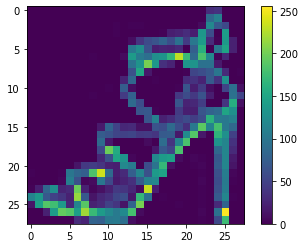

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

네트워크를 훈련하기 전에 데이터를 전처리해야 합니다. 훈련 세트에 있는 첫 번째 이미지를 보면 픽셀 값의 범위가 0~255 사이라는 것을 알 수 있습니다.  
신경망 모델에 주입하기 전에 이 값의 범위를 [0, 1]로 조정합니다. 이렇게 하려면 255로 나누어야 합니다. 훈련 세트와 테스트 세트를 동일한 방식으로 전처리하는 것이 중요합니다.

In [6]:
train_images = train_images / 255.0
valid_images = valid_images / 255.0
test_images = test_images / 255.0

훈련 데이터셋에서 처음 25개 image와 label을 출력해서 데이터 포맷을 확인합니다.

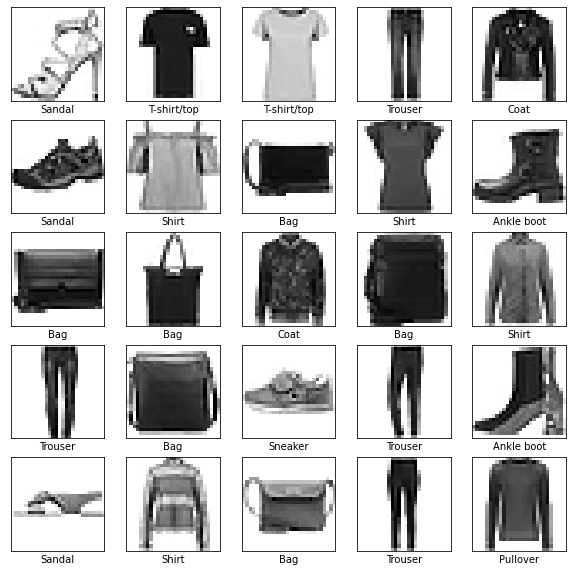

In [7]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(labels_names[train_labels[i]])
plt.show()

### 4. 모델 구성  (+ 하이퍼파라미터 설정)

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

> __autoDL에서 최적화할 Hyperparameter 지정__

In [9]:
num_nodes = 128
learning_rate = 0.001
batch_size = 256

### 5. 모델 컴파일
모델 컴파일 단계에서 다음의 설정이 필요합니다.
- 손실 함수(Loss function): 훈련 하는 동안 모델의 오차를 측정합니다. 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 합니다.
- 옵티마이저(Optimizer): 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정합니다.
- 지표(Metrics): 훈련 단계와 테스트 단계를 모니터링하기 위해 사용합니다. 다음 예에서는 올바르게 분류된 이미지의 비율인 정확도를 사용합니다.

In [10]:
Adam = keras.optimizers.Adam(lr=learning_rate)

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam,
              metrics=['accuracy'])

### 6. (optional) Slack 

In [ ]:
token = 'your slack token'
cid = 'your slack channel id'

accu.set_slack(token = token, channel_id = cid)

##accu.send_message(theresholds = 0.1)
accu.send_message(message = 'AccuInsight+ 모델 학습 완료')

### 7. autolog() 실행
- `autolog()`에 현재 학습할 모델에 관한 간단한 tag를 입력할 수 있습니다.
- `autolog()`는 반드시 모델 학습(model.fit()) __이전에__ 호출이 되어야 합니다.

> __모델 학습이 완료되면 `autolog()`는 자동으로 해제됩니다.__  
따라서 모델 학습 이력을 추가하고자 할 경우, 다시 한 번 `autolog()` 호출 후 모델 훈련을 진행해야 합니다.

__(주의) image 데이터의 경우, model_monitor는 사용할 수 없습니다.__(default: `model_monitor = False`)

In [11]:
from Accuinsight.Lifecycle.tensorflow import accuinsight

accu = accuinsight()

### 
accu.autolog('tutorial-fashion-mnist', best_weights = True, model_monitor = False)

### 8. 모델 학습
- autolog()를 사용하기 위해서는 `validation_data`를 반드시 지정해주어야 합니다.

In [12]:
model.fit(train_images, train_labels, epochs=5, batch_size = batch_size, validation_data = (valid_images, valid_labels))

Using autolog(best_weights=True, model_monitor=False)


Epoch 1/5
196/196 [==============================] - 1s 5ms/step - loss: 0.6303 - accuracy: 0.7847 - val_loss: 0.4815 - val_accuracy: 0.8286
Epoch 2/5
196/196 [==============================] - 1s 4ms/step - loss: 0.4369 - accuracy: 0.8487 - val_loss: 0.4149 - val_accuracy: 0.8551
Epoch 3/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3916 - accuracy: 0.8630 - val_loss: 0.4115 - val_accuracy: 0.8568
Epoch 4/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3736 - accuracy: 0.8684 - val_loss: 0.3664 - val_accuracy: 0.8707
Epoch 5/5
196/196 [==============================] - 1s 4ms/step - loss: 0.3445 - accuracy: 0.8782 - val_loss: 0.3646 - val_accuracy: 0.8736

Using epoch 00005 with val_accuracy: 0.87360


### 9. 저장된 모델 불러오기
- `autolog()`를 사용하여 모델의 학습 이력을 Lifecycle에 기록할 경우, 자동으로 훈련 도중 가장 좋은 metric을 기록한 epoch에서의 모델 가중치가 저장됩니다.
- 따라서 저장된 모델을 불러와 공동 작업자들과 모델을 공유하거나, 모델 재학습을 수행할 수 있습니다.

    1. Accuinsight+ workspace list 혹은 해당 모델의 상세화면으로 접속하여 _Experiment_ 중 불러오고자 하는 모델의 __Run name__을 복사합니다.
    2. ___utils___에서 `load_model()` 함수를 호출하여 모델을 불러올 수 있습니다.

In [13]:
from Accuinsight.Lifecycle.utils import load_model

saved_model = load_model('run_id')

In [14]:
saved_model.get_weights()

[array([[ 0.11340228, -0.07044571, -0.00872111, ...,  0.08225152,
          0.02748836, -0.04041702],
        [ 0.02830674,  0.07664391, -0.0106697 , ..., -0.00865228,
         -0.08343516,  0.03289701],
        [ 0.02218702,  0.08393511, -0.12261301, ...,  0.0742122 ,
         -0.0227375 , -0.0861502 ],
        ...,
        [ 0.15755829, -0.04699432,  0.02047099, ..., -0.04657659,
          0.03209102,  0.03310179],
        [ 0.17072345, -0.00403333, -0.07011338, ..., -0.08557947,
          0.07491539,  0.04749413],
        [ 0.06518884,  0.05794446,  0.01387202, ...,  0.02675939,
         -0.03269139,  0.00574005]], dtype=float32),
 array([ 0.07009827,  0.09444837,  0.09106439,  0.10911348, -0.01533793,
        -0.16324344,  0.02784152,  0.06902572, -0.00725802,  0.13284525,
         0.00150997,  0.09044795,  0.25376698, -0.0932553 , -0.08492976,
         0.14789607, -0.13596554,  0.08665868, -0.12408017, -0.08509911,
         0.09029359, -0.15372044, -0.01015081,  0.2174207 , -0.018

-------
### AutoDL에 사용할 데이터 csv 형식으로 저장
- 반드시 `filestorage`에 저장해야 하며, 데이터 저장 형식으로 csv, npy 등 다른 확장자도 사용 가능함

In [ ]:
np.save('filestorage/train_images.npy')
np.save('filestorage/train_labels.npy')
np.save('filestorage/valid_images.npy')
np.save('filestorage/valid_labels.npy')
np.save('filestorage/test_images.npy')
np.save('filestorage/test_labels.npy')